In [4]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [5]:
import os
input_file = os.path.abspath('../glove.6B/glove.6B.100d.txt')
output_file = os.path.abspath('./glove.6B.100d.word2vec.txt')
glove_file = datapath(input_file)
print(glove_file)
word2vec_glove_file = get_tmpfile(output_file)
print(word2vec_glove_file)

E:\2019TrainMine\StanfFordNLP\Homework01\glove.6B\glove.6B.100d.txt
E:\2019TrainMine\StanfFordNLP\Homework01\Gensim\glove.6B.100d.word2vec.txt


In [6]:
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [7]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [8]:
model.most_similar(positive=['apple','juice'],negative=[] ,topn=10)

[('lemon', 0.7559359073638916),
 ('tomato', 0.6767762899398804),
 ('mango', 0.6753185391426086),
 ('fruit', 0.6741775870323181),
 ('lime', 0.6663845777511597),
 ('cider', 0.6652835607528687),
 ('cream', 0.6577982902526855),
 ('pineapple', 0.6567156314849854),
 ('vinegar', 0.646820068359375),
 ('soda', 0.6369396448135376)]

In [9]:
result = model.most_similar(positive=['woman','king'],negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [10]:
result = model.most_similar(positive=['woman','king'],negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


X1 like X2 and Y1 like what?  
X2 - X1 + Y1

x1-------->x2  
y1-------->?

In [11]:
def analysis(x1,x2,y1):
    result = model.most_similar(positive=[x2,y1],negative=[x1])
    return result[0]

In [12]:
analysis('japan','japanese','australia')

('australian', 0.8923498392105103)

In [13]:
model['japan']

array([-0.02181  ,  0.47382  ,  1.4777   ,  0.99108  , -0.14839  ,
       -1.4648   , -0.88994  ,  0.054107 , -0.049151 ,  0.041083 ,
        0.38699  ,  0.05619  ,  0.45343  ,  0.71486  ,  0.11549  ,
        0.093776 ,  0.33551  , -0.014449 , -0.44216  , -0.51026  ,
        1.3396   ,  0.10685  ,  0.15161  ,  1.1234   , -0.15404  ,
        0.32304  , -0.33192  ,  0.19961  ,  0.67151  ,  0.50399  ,
       -0.72861  ,  1.3046   , -0.55406  ,  0.77811  ,  0.034829 ,
        0.3011   ,  0.64479  , -0.7633   , -0.82385  , -1.3391   ,
       -0.21368  , -0.37604  ,  0.4248   ,  0.38984  ,  0.31933  ,
       -0.19693  ,  1.3328   ,  0.12366  ,  0.068608 , -0.9102   ,
        0.21852  ,  0.085041 , -0.30843  ,  0.45397  , -0.13264  ,
       -2.0675   , -0.26428  , -0.45631  ,  1.4488   ,  1.1532   ,
       -0.43613  ,  0.18941  , -0.082103 ,  0.54275  ,  0.26388  ,
        0.6881   , -0.61392  ,  1.0225   ,  0.52642  ,  0.26216  ,
       -0.10922  ,  0.093592 , -0.62552  ,  0.3811   , -0.2335

In [14]:
model.vocab['for']
#np.random.choice(list(model.vocab.keys()),10)

In [15]:
[word for word in model.vocab]

['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is',
 'was',
 'said',
 'with',
 'he',
 'as',
 'it',
 'by',
 'at',
 '(',
 ')',
 'from',
 'his',
 "''",
 '``',
 'an',
 'be',
 'has',
 'are',
 'have',
 'but',
 'were',
 'not',
 'this',
 'who',
 'they',
 'had',
 'i',
 'which',
 'will',
 'their',
 ':',
 'or',
 'its',
 'one',
 'after',
 'new',
 'been',
 'also',
 'we',
 'would',
 'two',
 'more',
 "'",
 'first',
 'about',
 'up',
 'when',
 'year',
 'there',
 'all',
 '--',
 'out',
 'she',
 'other',
 'people',
 "n't",
 'her',
 'percent',
 'than',
 'over',
 'into',
 'last',
 'some',
 'government',
 'time',
 '$',
 'you',
 'years',
 'if',
 'no',
 'world',
 'can',
 'three',
 'do',
 ';',
 'president',
 'only',
 'state',
 'million',
 'could',
 'us',
 'most',
 '_',
 'against',
 'u.s.',
 'so',
 'them',
 'what',
 'him',
 'united',
 'during',
 'before',
 'may',
 'since',
 'many',
 'while',
 'where',
 'states',
 'because',
 'now',
 'city',
 'made',
 'like',
 

In [21]:
np.random.choice(list(model.vocab.keys()),10)

array(['acocks', 'stankevicius', 'indiscernible', 'cinemax', 'ssgt',
       'qualm', 'papillion', 'unscored', 'bahun', 'rtty'], dtype='<U68')

In [28]:
def dis_pca_scatterplot(model,words=None,sample=0):
    if words == None:
        if sample>0:
            words = np.random.choice(list(model.vocab.keys()),sample)
        else:
            words = [word for word in model.vocab]
    word_vector = np.array([model[w] for w in words]) 
#     print(word_vector.shape)
#     print(PCA().fit_transform(word_vector).shape)
#     print(PCA().fit_transform(word_vector)[:,:2])
    twodim = PCA().fit_transform(word_vector)[:,:2]
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0],twodim[:,1],edgecolors='y',c='r')
   # plt.text(twodim[:,0],twodim[:,1],words,fontsize=9)
    for word,(x,y) in zip(words,twodim):
        plt.text(x+0.5,y+0.5,word)

<IPython.core.display.Javascript object>


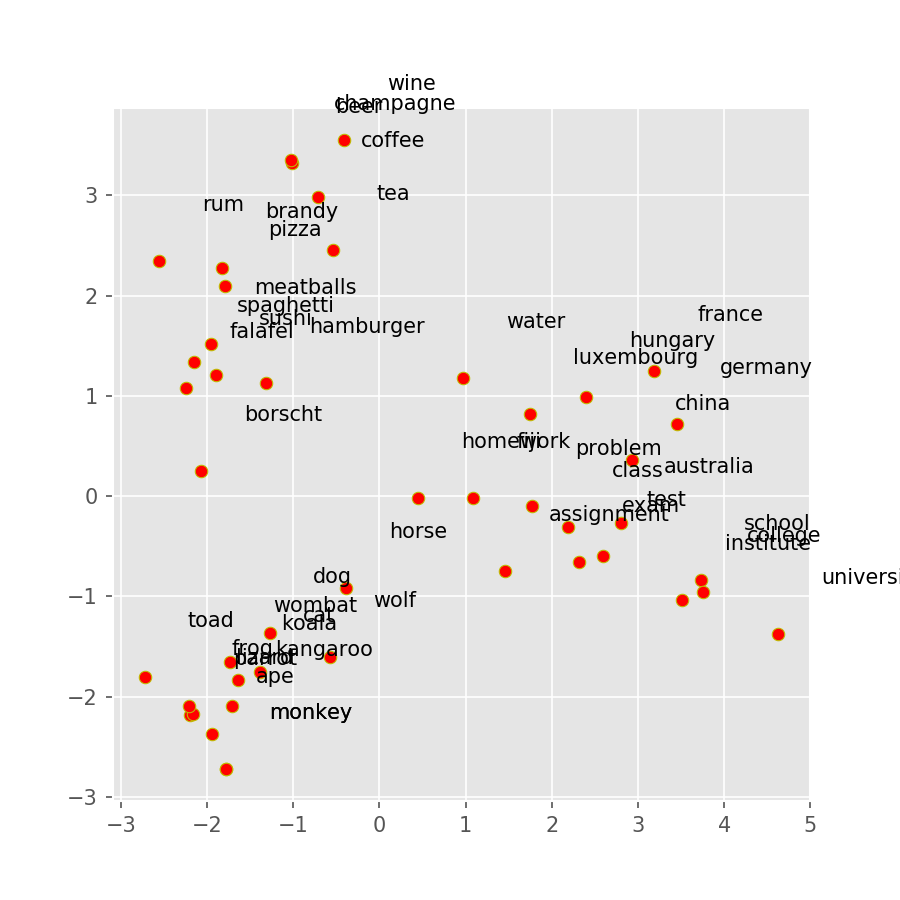

In [29]:
dis_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

In [ ]:
dis_pca_scatterplot(model, sample=46)